In [1]:
%config Completer.use_jedi = False

In [16]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from imgaug import augmenters as iaa

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
def getFileName(filePath):
    return filePath.split('\\')[-1]

In [4]:
path = 'simulation_data'

In [5]:
def importData(path):
    columns = ['Center','Left','Right','Steering','Throttle','Brake','Speed']
    data = pd.read_csv(os.path.join(path, 'driving_log.csv'),names = columns)
#     print(data.head())
#     print(data['Center'][0])
#     print(getFileName(data['Center'][0]))
    data['Center'] = data['Center'].apply(getFileName)
    print(data.head())
    print(data.shape[0])
    return data

In [6]:
data = importData('simulation_data/')

                               Center  \
0  center_2021_11_22_23_36_47_786.jpg   
1  center_2021_11_22_23_36_47_851.jpg   
2  center_2021_11_22_23_36_47_920.jpg   
3  center_2021_11_22_23_36_47_987.jpg   
4  center_2021_11_22_23_36_48_055.jpg   

                                                Left  \
0  F:\github\self_driving_car\simulation_data\IMG...   
1  F:\github\self_driving_car\simulation_data\IMG...   
2  F:\github\self_driving_car\simulation_data\IMG...   
3  F:\github\self_driving_car\simulation_data\IMG...   
4  F:\github\self_driving_car\simulation_data\IMG...   

                                               Right  Steering  Throttle  \
0  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
1  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
2  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
3  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
4  F:\github\self_driving_car\simula

In [7]:
data

,Center,Left,Right,Steering,Throttle,Brake,Speed
0,center_2021_11_22_23_36_47_786.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000007
1,center_2021_11_22_23_36_47_851.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000021
2,center_2021_11_22_23_36_47_920.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000004
3,center_2021_11_22_23_36_47_987.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000022
4,center_2021_11_22_23_36_48_055.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000005
...,...,...,...,...,...,...,...
21058,center_2021_11_23_00_36_34_927.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.155977
21059,center_2021_11_23_00_36_34_998.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156202
21060,center_2021_11_23_00_36_35_072.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156501
21061,center_2021_11_23_00_36_35_145.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156797


In [8]:
def balanceData(data, display=True):
    nBins = 21
    samplesPerBin = 3000
    hist, bins = np.histogram(data['Steering'], nBins)
#     print(bins)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
    #     print(center)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1,1),(samplesPerBin, samplesPerBin))
        plt.show()
        
    removeIndexList = []
    for j in range(nBins):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
                binDataList.append(i)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeIndexList.extend(binDataList)
        
    print("Removed Images: ", len(removeIndexList))
    
    data.drop(data.index[removeIndexList], inplace=True)
    print('Remaining Images: ', len(data))
    
    if display:
        hist, _ = np.histogram(data['Steering'], nBins)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1,1), (samplesPerBin, samplesPerBin))
        plt.show()
        
    return data

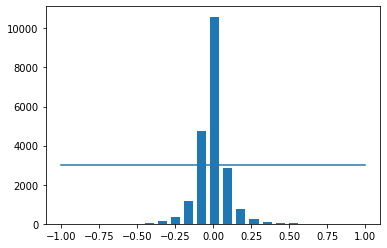

Removed Images:  9354
Remaining Images:  11709


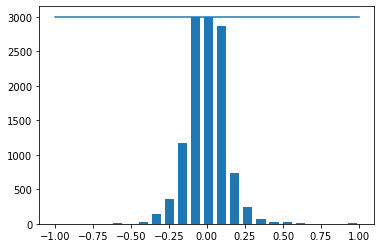

In [9]:
balanced_data = balanceData(data, display=True)

In [10]:
def loadData(path, data):
    imagesPath = []
    steering = []
    for i in range(len(data)):
        indexedData = data.iloc[i]
#         print(indexedData)
        imagesPath.append(os.path.join(path, 'IMG', indexedData[0]))
#         print(os.path.join(path, 'IMG', indexedData[0]))
        steering.append(float(indexedData[3]))
        
    imagesPath = np.asarray(imagesPath)
    steering = np.asarray(steering)
    
    return imagesPath, steering

In [11]:
imagesPath, steerings = loadData(path, balanced_data)

In [12]:
print(imagesPath[0], steerings[0])

simulation_data\IMG\center_2021_11_22_23_36_47_786.jpg 0.0


In [13]:
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)

In [14]:
print(xTrain.shape)
print(xVal.shape)
print(yTrain.shape)
print(yVal.shape)

(9367,)
(2342,)
(9367,)
(2342,)


In [21]:
def augmentImage(imagePath, steering):
    img = mpimg.imread(imagePath)
    pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
    img = pan.augment_image(img)
    return img, steering

In [27]:
imgR, stR = augmentImage('test.jpg',0)

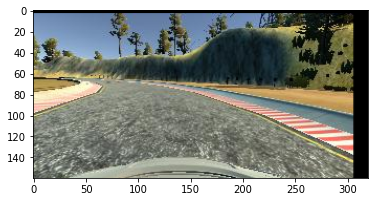

In [28]:
plt.imshow(imgR)
plt.show()

In [29]:
stR

0